In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
df=pd.read_csv('data.csv')
df.tail(10)

,age,sex,cp,trestbps,restecg,exang,oldpeak,output
284,49,1,4,128,0,1,0.0,1
285,49,1,4,150,0,0,2.0,0
286,50,1,4,140,1,1,5.0,1
287,50,1,4,140,1,1,2.5,1
288,52,1,4,140,0,1,2.0,1
289,52,1,4,160,0,1,2.5,0
290,54,0,3,130,1,1,0.0,1
291,56,1,4,155,0,1,3.0,0
292,58,0,2,180,0,1,1.0,0
293,65,1,4,130,1,1,1.0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 8 columns):
age         294 non-null int64
sex         294 non-null int64
cp          294 non-null int64
trestbps    294 non-null int64
restecg     294 non-null int64
exang       294 non-null int64
oldpeak     294 non-null float64
output      294 non-null int64
dtypes: float64(1), int64(7)
memory usage: 18.5 KB


In [24]:
df.describe()

,age,sex,cp,trestbps,restecg,exang,oldpeak,output
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.540816,0.221088,0.302721,0.586054,0.894558
std,7.811812,0.447533,0.965117,17.611760,0.462333,0.460219,0.908648,0.821493
min,28.000000,0.000000,1.000000,92.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,0.000000,0.000000,0.000000,1.000000
75%,54.000000,1.000000,4.000000,140.000000,0.000000,1.000000,1.000000,2.000000
max,66.000000,1.000000,4.000000,200.000000,2.000000,1.000000,5.000000,2.000000


In [25]:
data1=df.drop(['oldpeak'],axis=1)
data1.head()

,age,sex,cp,trestbps,restecg,exang,output
0,28,1,2,130,2,0,2
1,29,1,2,120,0,0,2
2,29,1,2,140,0,0,2
3,30,0,1,170,1,0,0
4,31,0,2,100,1,0,2


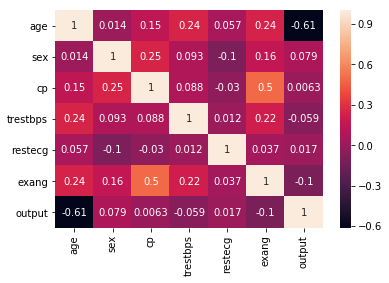

In [26]:
correlation_matrix=data1.corr()

sns.heatmap(correlation_matrix,annot=True)

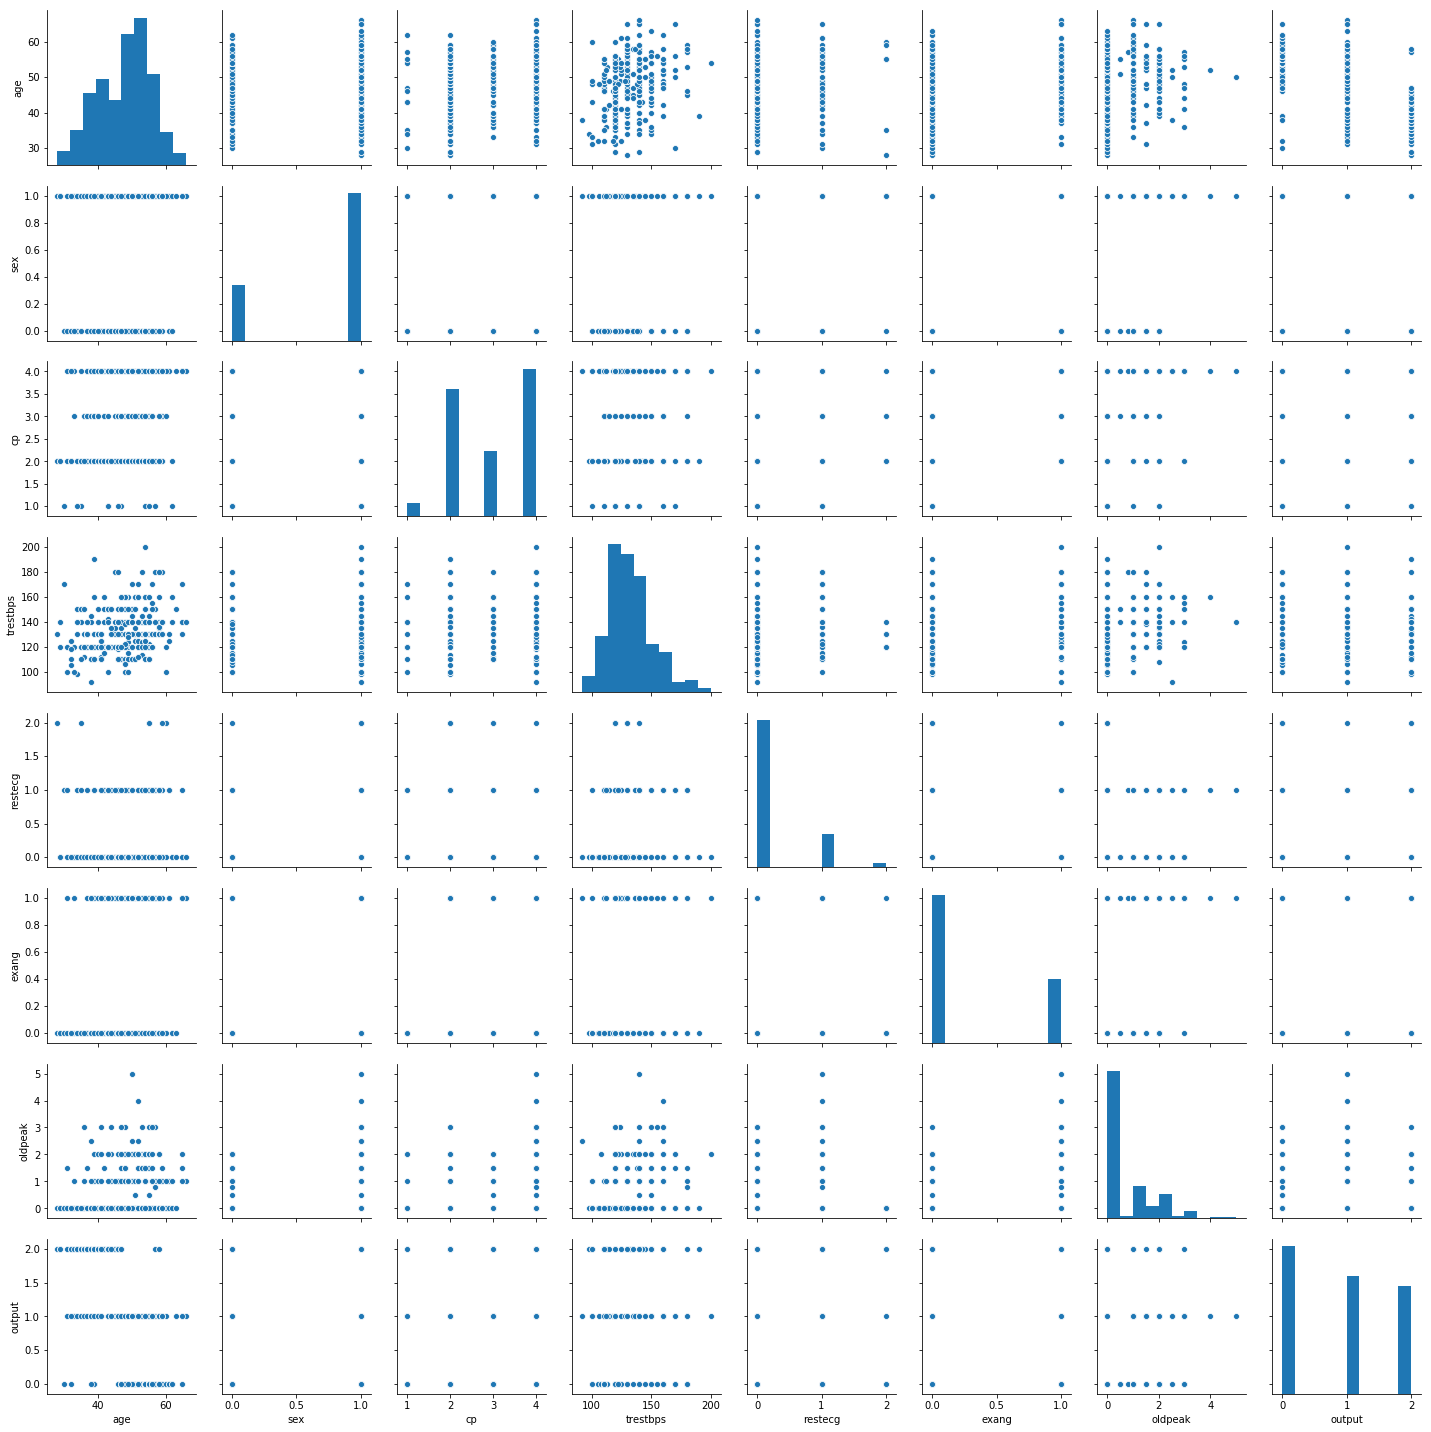

In [27]:
sns.pairplot(df)

## Scaling data using StandardScaler
- mean 0 , std 1

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaling=StandardScaler()
scaled_data=scaling.fit_transform(data1)

C:\Users\limon28\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\limon28\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
scaled_df=pd.DataFrame(scaled_data,columns=data1.columns)
scaled_df.head()

,age,sex,cp,trestbps,restecg,exang,output
0,-2.542347,0.616670,-1.020259,-0.144514,3.854246,-0.658898,1.347944
1,-2.414117,0.616670,-1.020259,-0.713285,-0.479017,-0.658898,1.347944
2,-2.414117,0.616670,-1.020259,0.424256,-0.479017,-0.658898,1.347944
3,-2.285888,-1.621613,-2.058170,2.130568,1.687614,-0.658898,-1.090798
4,-2.157658,-1.621613,-1.020259,-1.850826,1.687614,-0.658898,1.347944


## Plot some Graph

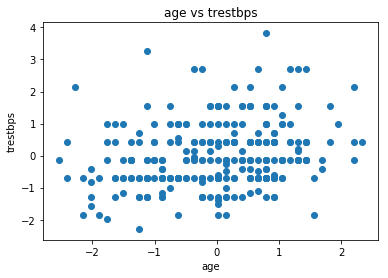

In [31]:
x=scaled_df['age']
y=scaled_df['trestbps']
plt.scatter(x,y)
plt.xlabel('age')
plt.ylabel('trestbps')
plt.title('age vs trestbps')
plt.show()

## BIRCH
BIRCH stands for Balanced Iterative Reducing and Clustering Using Hierarchies, which uses hierarchical methods to cluster and reduce data. BIRCH only needs to scan the data set in a single pass to perform clustering.

In [32]:
from sklearn.cluster import Birch

In [33]:
birch_cluster=Birch(n_clusters=3)

In [34]:
birch_cluster.fit(scaled_df)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
   threshold=0.5)

In [35]:
birch_cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [36]:
predicted_labels=birch_cluster.fit_predict(scaled_data)
predicted_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

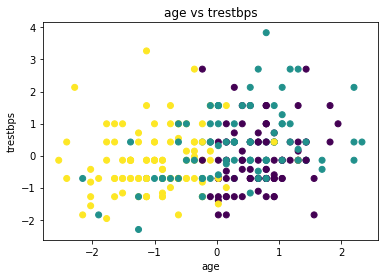

In [38]:
x=scaled_df['age']
y=scaled_df['trestbps']
plt.scatter(x,y,c=predicted_labels)
plt.xlabel('age')
plt.ylabel('trestbps')
plt.title('age vs trestbps')
plt.show()

AttributeError: 'PathCollection' object has no attribute 'legend_elements'

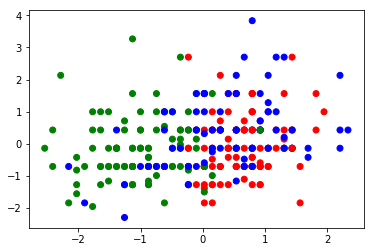

In [39]:
from matplotlib.colors import ListedColormap
x=scaled_df['age']
y=scaled_df['trestbps']
classes = ['Cluster 0', 'Cluster 1', 'Cluster 2']
values = predicted_labels
colours = ListedColormap(['r','b','g'])
scatter = plt.scatter(x, y,c=values, cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

AttributeError: 'Birch' object has no attribute 'cluster_centers_'

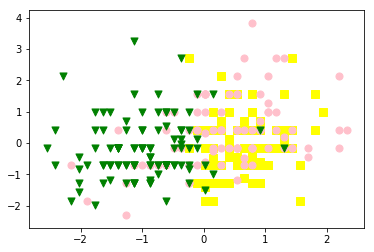

In [42]:
plt.scatter(x[predicted_labels == 0],
            y[predicted_labels == 0],
            s=50,
            c='yellow',
            marker='s',
            label='cluster 1')

plt.scatter(x[predicted_labels == 1],
            y[predicted_labels == 1],
            s=50,
            c='pink',
            marker='o',
            label='cluster 2')
plt.scatter(x[predicted_labels == 2],
            y[predicted_labels == 2],
            s=50,
            c='green',
            marker='v',
            label='cluster 3')
plt.scatter(birch_cluster.cluster_centers_[:,0],
            birch_cluster.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.legend()